In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Tempo de queda para dentro de um poço que atravessa a terra 

## Definição da força de dentro do poço a uma distância $r$

A força da gravidade segundo newton, é definida como:

$${F_g}=\frac{GM_tm}{r^2}\tag{1}$$

Onde $r$ é a distância do centro da terra, $Mt$ é massa da terra, $m$ a sua massa e $G$ é a constante gravitacional padrão.

Cabe notar que usando essa notação você teria uma forca de gravidade infinita no centro de gravidade de todo objeto. Como você deve saber, uma gravidade "infinita" é algo que só buracos negros têm, e a terra, uma bola de boliche, você, eu e sla mais quem, não tem um buraco negro no seu centro, logo a força da gravidade deve funcionar de forma diferente dentro dos corpos.

Quando você cava um buraco, a força da gravidade é dessa forma:

<img src="image1.jpg" alt="Drawing" style="width: 200px;"/>

$$F_g'=\frac{GM_t'm}{r^2} \tag{2}$$

Sendo $M_t'$ a massa da casca ao seus pés.

Se você imaginar que quando você está no buraco, há uma esfera em baixo de você nos seus pés, e uma casca esférica acima. É de se imaginar de que há gravidade puxando para baixo, em direção da esfera como toda boa gravidade, e uma gravidade puxando para cima em direção da casca. 

Mas a força da gravidade na casca não aponta apenas para cima, ela aponta para todas os pontos, ou pequenas caixas e suas massas, que montam a casca, assim como a força na esfera ao seus pés é a soma de todas as pequenas forças das pequenas partes que fazem a esfera. A gravidade da casca se anula após a soma de todas as forças gravitacionais infinitesimais da casca, ao passo de que a soma das forças de gravidade da esfera ao seus pés, aponta para seu centro.

Então a o efeito da gravidade da casca é desconsiderada.

Quando você chegar no centro da  terra, significa que a gravidade é direcionada em todas as direções, então após você somar forças em todas as direções, o total da $F_g$ deve ser zero.

A densidade vezes o volume de uma esfera regular de raio $r'$ é:

$$M_t'=\rho \frac{4 \pi r'^3}{3}$$

A densidade da terra nesse exemplo pode ser considerada constante em todo seu volume. (na vida real, sua densidade varia com a profundidade), então a densidade $\rho$ é

$$
\begin{split}
\rho & = \frac{M_t}{V_t} \\
\rho & = \frac{3 M_t}{4\pi R_t^3} \\ 
\end{split}
$$

onde $V_t$ é o volume da terra. $V_t = \frac{4}{3}\pi R_t^3$

$$
\begin{split}
M_t' & =\rho \frac{4 \pi r^3}{3}\\
M_t' & = M_t \frac{r^3}{R_t^3}
\end{split}
$$

Substituindo $M_t'$ na equação (2):

$$F_g' = \frac{G M_t m r}{R_t^3}$$

Vamos considerar $G M_t = \mu$. 

$$F_g' = \frac{\mu m r}{R_t^3} \tag{3}$$

Essa é a força da gravidade para dentro do corpo celeste observado.

Vamos plotar um grafico para  a aceleração da gravidade em um corpo

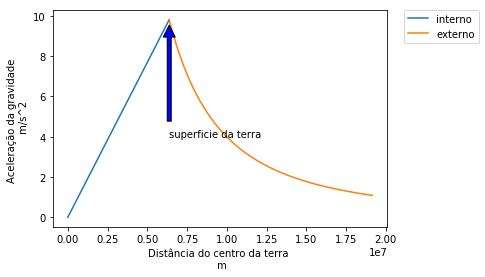

In [2]:
G = 6.67408e-11  # Constante gravitacional padrão
Mt = 5.972e24  # kilos
Rt = 6378.1e3  # metros
u = G * Mt

def Fg_internal(r):
    return u * r / Rt ** 3

def Fg_external(h):
    return u / h ** 2

r = np.linspace(0, Rt, 1000)
h = np.linspace(Rt, Rt*3, 1000)

plt.plot(r, Fg_internal(r), label='interno')
plt.plot(h, Fg_external(h), label='externo')
plt.ylabel('Aceleração da gravidade \n m/s^2')
plt.xlabel('Distância do centro da terra \n m')
plt.annotate('superficie da terra',
             xy=(Rt, Fg_internal(Rt)),
             xytext=(Rt, 4),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Perceba como a aceleração diminui conforme entramos para dentro da terra

## Equação diferencial do movimento 

Em muitos sentidos, após você cair dentro de poço, você passa pelo centro e chega do outro lado, e então cai de novo e chega aonde você começou.

A força (3) é semelhante com a força elástica, então estamos esperando um movimento oscilatório.
Cabe notar que nesse momento, essa força é negativa, pois ela aponta para o centro.

<img src="image2.jpg" alt="Drawing" style="width: 200px;"/>

A força é $F=m*a$. Se derivarmos r uma vez, temos $\dot{r}$, a velodicade. Derivando de novo teremos nossa aceleração $\ddot{r}$.

$$
\begin{split}
m*\ddot{r} & = -\frac{\mu m r}{R_t^3}\\
m*\ddot{r} + \frac{\mu m r}{R_t^3} & = 0 \\
\ddot{r} + \frac{\mu r}{R_t^3} & = 0
\end{split}
$$

Essa equação pode ser solucionada como EDO de segundo grau:

$$
\begin{split}
\lambda & + \frac{\mu}{R_t^3} = 0\\
\lambda & = 0 \pm i \sqrt{\frac{\mu}{R_t^3}}
\end{split}
$$
$$
\begin{split}
& \alpha = 0 & \beta = \sqrt{\frac{\mu}{R_t^3}}\\
r(t) = & C_1 \cos{\beta t} + C_2 \sin{\beta t} 
\end{split}
$$

A solução do problema inicial é:

$$
\begin{split}
r(0) &= Rt\\
r(0) &=  C_1 \cos{\beta 0} + C_2 \sin{\beta 0}\\
Rt & =  C_1
\end{split}
$$

$$
\begin{split}
\dot{r}(0) &= 0\\
\dot{r}(0) &= -\beta C_1 \sin{\beta 0} + \beta C_2 \cos{\beta 0}\\
0 &= \beta C_2 \cos{0}\\
0 &= C_2
\end{split}
$$

Então a equação do movimento em relação ao tempo é :

$$
r(t) = R_t \cos{\sqrt{\frac{\mu}{R_t^3}} t} \tag{4}
$$

Para descobrirmos o periodo é apenas dividir a parte que multiplica $t$ por $ 2 \pi $

$$
\Pi = \frac{2 \pi}{\sqrt{\frac{\mu}{R_t^3}}}
$$

O tempo em segundos do período é:

In [3]:
P = (2 * pi) / (np.sqrt((u)/(Rt**3)))

print(P, "segundos")

5069.4547507 segundos


O tempo do meio período para chegar do outro lado é:

In [4]:
print(P / 2, "segundos") 
print("ou")
print((P/2)/60, "minutos")

2534.72737535 segundos
ou
42.2454562559 minutos


## Conclusão:
Se você cair no poço, você chega do outro lado em 42 minutos